# Importing Modules

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import ipywidgets as ipyw
import matplotlib as mpl
import pandas_datareader as pdr
import datetime as dt
from cycler import cycler
import quandl
import plotly.express as px
import plotly.graph_objects as go
import pandas_datareader.data as web
%matplotlib notebook
%matplotlib inline

# Importing Stock Data

## Using Yahoo Finance

In [5]:
ha = yf.Ticker("HA")
rcl = yf.Ticker("RCL")
ihg = yf.Ticker("IHG")
riot = yf.Ticker("RIOT")
ea = yf.Ticker("EA")
msft = yf.Ticker("MSFT")
hrb = yf.Ticker("HRB")
payx = yf.Ticker("PAYX")
adp = yf.Ticker("ADP")

## 1 Year History

In [6]:
ha_hist = ha.history(period="1y")
rcl_hist = rcl.history(period="1y")
ihg_hist = ihg.history(period="1y")
riot_hist = riot.history(period="1y")
ea_hist = ea.history(period="1y")
msft_hist = msft.history(period="1y")
hrb_hist = hrb.history(period="1y")
payx_hist = payx.history(period="1y")
adp_hist = adp.history(period="1y")

# DataFrame Isolation

In [7]:
ha_hist_close = pd.DataFrame(ha_hist, columns=['Close'])
rcl_hist_close = pd.DataFrame(rcl_hist, columns=['Close'])
ihg_hist_close = pd.DataFrame(ihg_hist, columns=['Close'])
riot_hist_close = pd.DataFrame(riot_hist, columns=['Close'])
ea_hist_close = pd.DataFrame(ea_hist, columns=['Close'])
msft_hist_close = pd.DataFrame(msft_hist, columns=['Close'])
hrb_hist_close = pd.DataFrame(hrb_hist, columns=['Close'])
payx_hist_close = pd.DataFrame(payx_hist, columns=['Close'])
adp_hist_close = pd.DataFrame(adp_hist, columns=['Close'])

## Concatting the Dataframes

In [8]:
tropical_paradise_df = pd.concat([ha_hist_close, rcl_hist_close, ihg_hist_close], axis="columns", join="inner")
gaming_the_system_df = pd.concat([riot_hist_close, ea_hist_close, msft_hist_close], axis="columns", join="inner")
digital_paper_df = pd.concat([hrb_hist_close, payx_hist_close, adp_hist_close], axis="columns", join="inner")

## Plotting the Returns from the Last Year

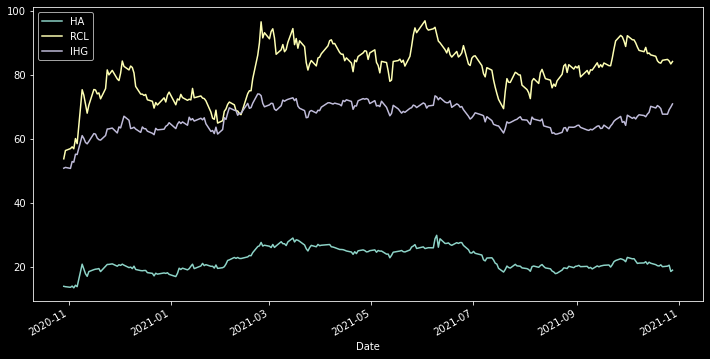

In [9]:
with plt.style.context('dark_background'):
    tropical_df_plot = tropical_paradise_df['Close'].plot(figsize=(12, 6))
    tropical_df_plot.legend(["HA", "RCL", "IHG"]);
    plt.show()

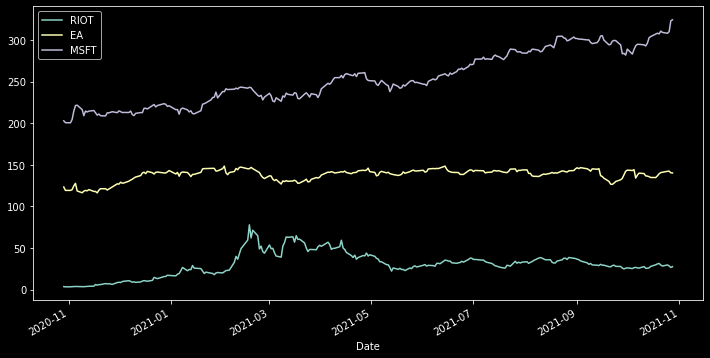

In [10]:
with plt.style.context('dark_background'):
    gaming_df_plot = gaming_the_system_df['Close'].plot(figsize=(12, 6))
    gaming_df_plot.legend(["RIOT", "EA", "MSFT"]);
    plt.show()

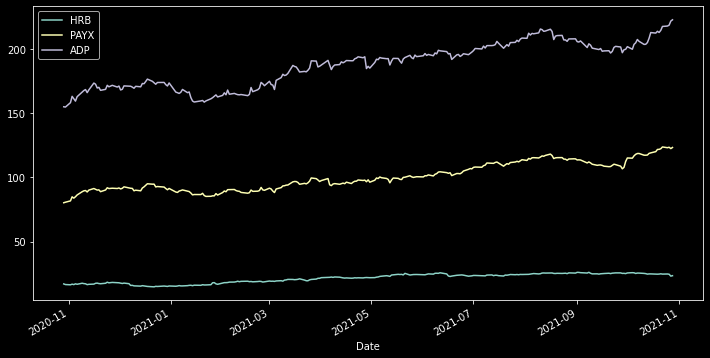

In [11]:
with plt.style.context('dark_background'):
    dp_df_plot = digital_paper_df['Close'].plot(figsize=(12, 6))
    dp_df_plot.legend(["HRB", "PAYX", "ADP"]);
    plt.show()

# Data Analysis & Visualization via Monte Carlo Simulation and Efficient Frontier Graphing

## Tropical Paradise Data Pull and Clean-Up

In [12]:
tropical_tickers = ['HA', 'RCL', 'IHG']
start = dt.datetime(2020, 10, 10)

In [13]:
tropical_paradise_df_ret = tropical_paradise_df.pct_change().dropna()
tropical_paradise_df_ret.columns = ['HA', 'RCL', 'IHG']
tropical_paradise_df_ret

,HA,RCL,IHG
Date,,,
2020-10-30,-0.008590,0.048114,0.004913
2020-11-02,-0.013718,0.010635,-0.006062
2020-11-03,0.027818,0.009646,0.042298
2020-11-04,-0.039174,-0.010248,-0.003586
2020-11-05,0.060045,0.055985,0.046979
...,...,...,...
2021-10-22,-0.028516,0.010749,-0.024881
2021-10-25,0.008458,0.003309,-0.000295
2021-10-26,0.014800,-0.005771,0.020655


In [14]:
tropical_data = pdr.get_data_yahoo(tropical_tickers, start)
tropical_data = tropical_data['Adj Close']

<AxesSubplot:>

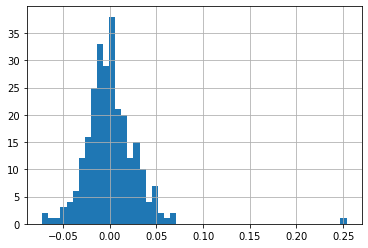

In [15]:
tropical_port = [.33, .33, .34]
tropic_log_return = np.sum(np.log(tropical_data/tropical_data.shift())*tropical_port, axis=1)

fig, ax = plt.subplots()
tropic_log_return.hist(bins=50, ax=ax)

In [16]:
tropical_sharpe = tropic_log_return.mean()/tropic_log_return.std()

In [17]:
tropical_asr = tropical_sharpe*252**.5

In [18]:
tropical_log_rets = np.log(tropical_data/tropical_data.shift())

### Monte Carlo for Tropical Paradise

In [19]:
n = 5000
 
weights = np.zeros((n, 3))
exp_rtns = np.zeros(n)
exp_vols = np.zeros(n)
sharpe_ratios = np.zeros(n)
 
for i in range(n):
    weight = np.random.random(3)
    weight /= weight.sum()
    weights[i] = weight
     
    exp_rtns[i] = np.sum(tropical_log_rets.mean() * weight) * 252
    exp_vols[i] = np.sqrt(np.dot(weight.T, np.dot(tropical_log_rets.cov() * 252, weight)))
    sharpe_ratios[i] = exp_rtns[i] / exp_vols[i]

### Efficient Frontier Graph for Tropical Paradise

Text(0, 0.5, 'Expected Return')

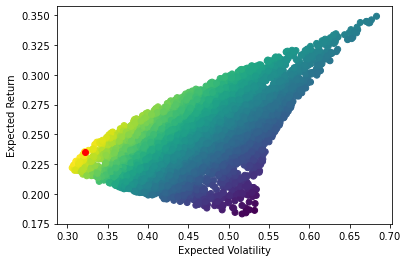

In [20]:
fig, ax = plt.subplots()
ax.scatter(exp_vols, exp_rtns, c=sharpe_ratios)
ax.scatter(exp_vols[sharpe_ratios.argmax()], exp_rtns[sharpe_ratios.argmax()], c='r')
ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')

## Gaming the System Data Pull and Clean-Up

In [21]:
gaming_tickers = ['RIOT', 'EA', 'MSFT']

In [22]:
gaming_the_system_df_ret = gaming_the_system_df.pct_change().dropna()
gaming_the_system_df_ret.columns = ['RIOT', 'EA', 'MSFT']
gaming_the_system_df_ret

,RIOT,EA,MSFT
Date,,,
2020-10-30,-0.078873,-0.032849,-0.010991
2020-11-02,0.006116,-0.000167,-0.000692
2020-11-03,0.063830,0.007762,0.020264
2020-11-04,0.014286,0.037850,0.048249
2020-11-05,0.056338,0.024100,0.031887
...,...,...,...
2021-10-22,-0.039402,0.003129,-0.005149
2021-10-25,0.046322,0.007939,-0.003332
2021-10-26,-0.038864,0.001477,0.006426


In [23]:
gaming_data = pdr.get_data_yahoo(gaming_tickers, start)
gaming_data = gaming_data['Adj Close']

<AxesSubplot:>

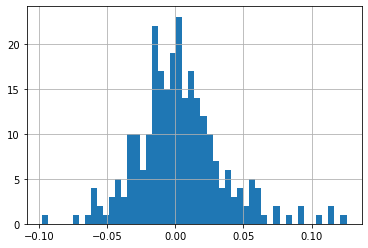

In [24]:
gaming_port = [.33, .33, .34]
gaming_log_ret = np.sum(np.log(gaming_data/gaming_data.shift())*gaming_port, axis=1)

fig, ax = plt.subplots()
gaming_log_ret.hist(bins=50, ax=ax)

In [25]:
gaming_sharpe = gaming_log_ret.mean()/gaming_log_ret.std()

In [26]:
gaming_asr = gaming_sharpe*252**.5

In [27]:
gaming_log_rets = np.log(gaming_data/gaming_data.shift())

### Monte Carlo for Gaming the System

In [28]:
n = 5000
 
weights = np.zeros((n, 3))
exp_rtns = np.zeros(n)
exp_vols = np.zeros(n)
sharpe_ratios = np.zeros(n)
 
for i in range(n):
    weight = np.random.random(3)
    weight /= weight.sum()
    weights[i] = weight
     
    exp_rtns[i] = np.sum(tropical_log_rets.mean() * weight) * 252
    exp_vols[i] = np.sqrt(np.dot(weight.T, np.dot(gaming_log_rets.cov() * 252, weight)))
    sharpe_ratios[i] = exp_rtns[i] / exp_vols[i]

### Efficient Frontier Graph for Gaming the System

Text(0, 0.5, 'Expected Return')

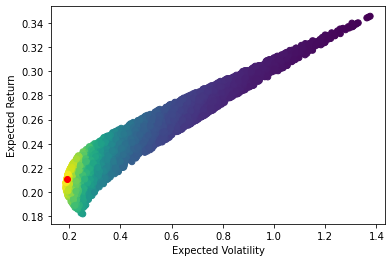

In [29]:
fig, ax = plt.subplots()
ax.scatter(exp_vols, exp_rtns, c=sharpe_ratios)
ax.scatter(exp_vols[sharpe_ratios.argmax()], exp_rtns[sharpe_ratios.argmax()], c='r')
ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')

## Digital Paper Data Pull and Clean-Up

In [30]:
dp_tickers = ['HRB', 'PAYX', 'ADP']

In [31]:
digital_paper_df_ret = digital_paper_df.pct_change().dropna()
digital_paper_df_ret.columns = ['HRB', 'PAYX', 'ADP']
digital_paper_df_ret

,HRB,PAYX,ADP
Date,,,
2020-10-30,-0.029246,0.005133,-0.001454
2020-11-02,-0.011587,0.012766,0.022157
2020-11-03,0.030480,0.038896,0.031091
2020-11-04,-0.020478,-0.012133,-0.011413
2020-11-05,0.036585,0.012984,-0.011362
...,...,...,...
2021-10-22,-0.008864,0.011358,0.014159
2021-10-25,0.003252,-0.004767,0.001470
2021-10-26,-0.007699,0.002841,0.003348


In [32]:
dp_data = pdr.get_data_yahoo(dp_tickers, start)
dp_data = dp_data['Adj Close']

<AxesSubplot:>

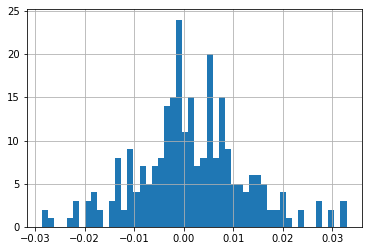

In [33]:
dp_port = [.33, .33, .34]
dp_log_ret = np.sum(np.log(dp_data/dp_data.shift())*dp_port, axis=1)

fig, ax = plt.subplots()
dp_log_ret.hist(bins=50, ax=ax)

In [34]:
dp_sharpe = dp_log_ret.mean()/dp_log_ret.std()

In [35]:
dp_asr = dp_sharpe*252**.5

In [36]:
dp_log_rets = np.log(dp_data/dp_data.shift())

### Monte Carlo for Digital Paper

In [37]:
n = 5000
 
weights = np.zeros((n, 3))
exp_rtns = np.zeros(n)
exp_vols = np.zeros(n)
sharpe_ratios = np.zeros(n)
 
for i in range(n):
    weight = np.random.random(3)
    weight /= weight.sum()
    weights[i] = weight
     
    exp_rtns[i] = np.sum(tropical_log_rets.mean() * weight) * 252
    exp_vols[i] = np.sqrt(np.dot(weight.T, np.dot(dp_log_rets.cov() * 252, weight)))
    sharpe_ratios[i] = exp_rtns[i] / exp_vols[i]

### Efficient Frontier Graph for Digital Paper

Text(0, 0.5, 'Expected Return')

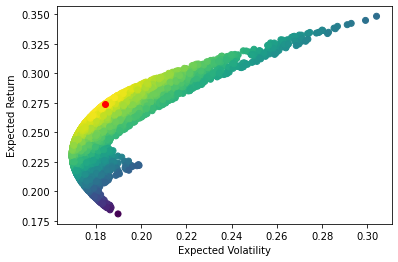

In [38]:
fig, ax = plt.subplots()
ax.scatter(exp_vols, exp_rtns, c=sharpe_ratios)
ax.scatter(exp_vols[sharpe_ratios.argmax()], exp_rtns[sharpe_ratios.argmax()], c='r')
ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')

# Using Bar Plots to Understand Each Stock Portfolio's Daily Range

## Bar Graphs for All Portfolios

In [39]:
start = dt.datetime(2020,10,16)
end = dt.datetime.now()

stocks = web.DataReader(['MSFT', 'HA', 'AA', 'IHG', 'RCL', 'EA', 'SONY', 'HRB', 'ADP', 'PAYX', 'RIOT'], 
                        'yahoo', start, end)

stocks_close = pd.DataFrame(web.DataReader(['MSFT', 'HA', 'RCL', 'IHG', 'EA', 'HRB', 'ADP', 'PAYX', 'RIOT' ], 
                                           'yahoo', start, end)['Close'])

In [40]:
HA_close = stocks_close.loc[:, 'HA']
IHG_close = stocks_close.loc[:, 'IHG']
RCL_close = stocks_close.loc[:, 'RCL']
short_rolling_ha = ha.rolling(window=20).mean()
long_rolling_ha = ha.rolling(window=50).mean()
short_rolling_ihg = ihg.rolling(window=20).mean()
long_rolling_ihg = ihg.rolling(window=50).mean()
short_rolling_rcl = rcl.rolling(window=20).mean()
long_rolling_rcl = rcl.rolling(window=50).mean()

AttributeError: 'Ticker' object has no attribute 'rolling'

In [ ]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(ha.index, ha, label='HA')
ax.plot(short_rolling_ha.index, short_rolling_ha, label='20 days rolling')
ax.plot(long_rolling_ha.index, long_rolling_ha, label='50 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

HA_close.describe()

In [ ]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(rcl.index, rcl, label='RCL')
ax.plot(short_rolling_rcl.index, short_rolling_rcl, label='20 days rolling')
ax.plot(long_rolling_rcl.index, long_rolling_rcl, label='50 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

RCL_close.describe()

In [ ]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(ihg.index, ihg, label='IHG')
ax.plot(short_rolling_ihg.index, short_rolling_ihg, label='20 days rolling')
ax.plot(long_rolling_ihg.index, long_rolling_ihg, label='50 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

IHG_close.describe()

## Gauge Graph

In [ ]:
c_bullet = go.Figure()

c_bullet.add_trace(go.Indicator(
    mode = "number+gauge+delta", 
    value = int(stocks_close['RCL'].tail(1)),
    delta = {'reference': int(stocks_close['RCL'].tail(2)[0])},
    domain = {'x': [0.25, 1], 
              'y': [0.08, 0.25]},
    title = {'text':"<b>ROYAL CARIBBEAN GROUP DAY<br>RANGE</b><br><span style='color: gray; font-size:0.8em'>U.S. $</span>", 
             'font': {"size": 14}},    
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, 100]},
        'threshold': {
            'line': {'color': "Red", 'width': 2},
            'thickness': 0.75,
            'value': 60.61},
        'steps': [
            {'range': [0, 60.61], 'color': "gray"},
            {'range': [60.61, 100], 'color': "lightgray"}],
        'bar': {'color': 'black'}}))

c_bullet.add_trace(go.Indicator(
    mode = "number+gauge+delta", 
    value = int(stocks_close['IHG'].tail(1)),
    delta = {'reference': int(stocks_close['IHG'].tail(2)[0])},
    domain = {'x': [0.25, 1], 
              'y': [0.4, 0.6]},
    title = {'text':"<b>INTERCONTINENTAL HOTELS DAY<br>RANGE</b><br><span style='color: gray; font-size:0.8em'>U.S. $</span>", 
             'font': {"size": 14}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, 100]},
        'threshold': {
            'line': {'color': "red", 'width': 2},
            'thickness': 0.75,
            'value': 54.83},
        'steps': [
            {'range': [0, 54.83], 'color': "gray"},
            {'range': [54.83, 100], 'color': "lightgray"}],
        'bar': {'color': 'black'}}))

c_bullet.add_trace(go.Indicator(
    mode = "number+gauge+delta", 
    value = int(stocks_close['HA'].tail(1)),
    delta = {'reference': int(stocks_close['HA'].tail(2)[0])},
    domain = {'x': [0.25, 1], 
              'y': [0.7, 0.9]},
    title = {'text':"<b>HAWAIIN AIRLINES DAY<br>RANGE</b><br><span style='color: gray; font-size:0.8em'>U.S. $</span>", 
             'font': {"size": 14}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, 100]},
        'threshold': {
            'line': {'color': "red", 'width': 2},
            'thickness': 0.75,
            'value': 12.97},
        'steps': [
            {'range': [0, 12.97], 'color': "gray"},
            {'range': [12.97, 100], 'color': "lightgray"}],
        'bar': {'color': "black"}}))

c_bullet.update_layout(height = 400 , margin = {'t':0, 'b':0, 'l':0})

TPC = pd.DataFrame(web.DataReader(['HA', 'RCL', 'IHG' ],
                                           'yahoo', start, end)['Close'])
TPC.plot(figsize=(16,9))
TPC.describe()
c_bullet.show()

# Gaming the System

In [ ]:
ea_close = stocks_close.loc[:, 'EA']
msft_close = stocks_close.loc[:, 'MSFT']
riot_close = stocks_close.loc[:, 'RIOT']
short_rolling_ea = ea.rolling(window=20).mean()
long_rolling_ea = ea.rolling(window=50).mean()
short_rolling_msft = msft.rolling(window=20).mean()
long_rolling_msft = msft.rolling(window=50).mean()
short_rolling_riot = riot.rolling(window=20).mean()
long_rolling_riot = riot.rolling(window=50).mean()

In [ ]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(msft.index, msft, label='MSFT')
ax.plot(short_rolling_msft.index, short_rolling_msft, label='20 days rolling')
ax.plot(long_rolling_msft.index, long_rolling_msft, label='50 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(riot.index, riot, label='RIOT')
ax.plot(short_rolling_riot.index, short_rolling_riot, label='20 days rolling')
ax.plot(long_rolling_riot.index, long_rolling_riot, label='50 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(ea.index, ea, label='EA')
ax.plot(short_rolling_ea.index, short_rolling_ea, label='20 days rolling')
ax.plot(long_rolling_ea.index, long_rolling_ea, label='50 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

EA_close.describe()

## Gauge Graph

In [ ]:
c_bullet = go.Figure()

c_bullet.add_trace(go.Indicator(
    mode = "number+gauge+delta", 
    value = int(stocks_close['RIOT'].tail(1)),
    delta = {'reference': int(stocks_close['RIOT'].tail(2)[0])},
    domain = {'x': [0.25, 1], 
              'y': [0.08, 0.25]},
    title = {'text':"<b>RIOT CHAIN DAY<br>RANGE</b><br><span style='color: gray; font-size:0.8em'>U.S. $</span>", 
             'font': {"size": 14}},    
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, 100]},
        'threshold': {
            'line': {'color': "Red", 'width': 2},
            'thickness': 0.75,
            'value': 3.50},
        'steps': [
            {'range': [0, 3.50], 'color': "gray"},
            {'range': [3.50, 100], 'color': "lightgray"}],
        'bar': {'color': 'black'}}))

c_bullet.add_trace(go.Indicator(
    mode = "number+gauge+delta", 
    value = int(stocks_close['EA'].tail(1)),
    delta = {'reference': int(stocks_close['EA'].tail(2)[0])},
    domain = {'x': [0.25, 1], 
              'y': [0.4, 0.6]},
    title = {'text':"<b>ELECTRONIC ARTS DAY<br>RANGE</b><br><span style='color: gray; font-size:0.8em'>U.S. $</span>", 
             'font': {"size": 14}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, 150]},
        'threshold': {
            'line': {'color': "red", 'width': 2},
            'thickness': 0.75,
            'value': 130.88},
        'steps': [
            {'range': [0, 130.88], 'color': "gray"},
            {'range': [130.88, 150], 'color': "lightgray"}],
        'bar': {'color': 'black'}}))

c_bullet.add_trace(go.Indicator(
    mode = "number+gauge+delta", 
    value = int(stocks_close['MSFT'].tail(1)),
    delta = {'reference': int(stocks_close['MSFT'].tail(2)[0])},
    domain = {'x': [0.25, 1], 
              'y': [0.7, 0.9]},
    title = {'text':"<b>MICROSOFT'S DAY<br>RANGE</b><br><span style='color: gray; font-size:0.8em'>U.S. $</span>", 
             'font': {"size": 14}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, 300]},
        'threshold': {
            'line': {'color': "red", 'width': 2},
            'thickness': 0.75,
            'value': 222.86},
        'steps': [
            {'range': [0, 222.86], 'color': "gray"},
            {'range': [222.86, 300], 'color': "lightgray"}],
        'bar': {'color': "black"}}))

c_bullet.update_layout(height = 400 , margin = {'t':0, 'b':0, 'l':0})

GC = pd.DataFrame(web.DataReader(['MSFT', 'EA', 'RIOT' ],
                                           'yahoo', start, end)['Close'])
GC.plot(figsize=(16,9))
GC.describe()
c_bullet.show()

# Making the World Go Around

In [ ]:
adp_close = stocks_close.loc[:, 'ADP']
payx_close = stocks_close.loc[:, 'PAYX']
hrb_close = stocks_close.loc[:, 'HRB']
short_rolling_adp = adp.rolling(window=20).mean()
long_rolling_adp = adp.rolling(window=50).mean()
short_rolling_payx = payx.rolling(window=20).mean()
long_rolling_payx = payx.rolling(window=50).mean()
short_rolling_hrb = hrb.rolling(window=20).mean()
long_rolling_hrb = hrb.rolling(window=50).mean()

In [ ]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(adp.index, adp, label='ADP')
ax.plot(short_rolling_adp.index, short_rolling_adp, label='20 days rolling')
ax.plot(long_rolling_adp.index, long_rolling_adp, label='50 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

adp_close.describe()

In [ ]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(payx.index, payx, label='PAYX')
ax.plot(short_rolling_payx.index, short_rolling_payx, label='20 days rolling')
ax.plot(long_rolling_payx.index, long_rolling_payx, label='50 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

payx_close.describe()

In [ ]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(hrb.index, hrb, label='HRB')
ax.plot(short_rolling_hrb.index, short_rolling_hrb, label='20 days rolling')
ax.plot(long_rolling_hrb.index, long_rolling_hrb, label='50 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

hrb_close.describe()

## Gauge Graph

In [ ]:
c_bullet = go.Figure()

c_bullet.add_trace(go.Indicator(
    mode = "number+gauge+delta", 
    value = int(stocks_close['HRB'].tail(1)),
    delta = {'reference': int(stocks_close['HRB'].tail(2)[0])},
    domain = {'x': [0.25, 1], 
              'y': [0.08, 0.25]},
    title = {'text':"<b>H&R BLOCK DAY<br>RANGE</b><br><span style='color: gray; font-size:0.8em'>U.S. $</span>", 
             'font': {"size": 14}},    
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, 100]},
        'threshold': {
            'line': {'color': "Red", 'width': 2},
            'thickness': 0.75,
            'value': 17.68},
        'steps': [
            {'range': [0, 17.68], 'color': "gray"},
            {'range': [17.68, 100], 'color': "lightgray"}],
        'bar': {'color': 'black'}}))

c_bullet.add_trace(go.Indicator(
    mode = "number+gauge+delta", 
    value = int(stocks_close['PAYX'].tail(1)),
    delta = {'reference': int(stocks_close['PAYX'].tail(2)[0])},
    domain = {'x': [0.25, 1], 
              'y': [0.4, 0.6]},
    title = {'text':"<b>PAYCHEX DAY<br>RANGE</b><br><span style='color: gray; font-size:0.8em'>U.S. $</span>", 
             'font': {"size": 14}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, 100]},
        'threshold': {
            'line': {'color': "red", 'width': 2},
            'thickness': 0.75,
            'value': 83},
        'steps': [
            {'range': [0, 83], 'color': "gray"},
            {'range': [83, 100], 'color': "lightgray"}],
        'bar': {'color': 'black'}}))

c_bullet.add_trace(go.Indicator(
    mode = "number+gauge+delta", 
    value = int(stocks_close['ADP'].tail(1)),
    delta = {'reference': int(stocks_close['ADP'].tail(2)[0])},
    domain = {'x': [0.25, 1], 
              'y': [0.7, 0.9]},
    title = {'text':"<b>ADP'S DAY<br>RANGE</b><br><span style='color: gray; font-size:0.8em'>U.S. $</span>", 
             'font': {"size": 14}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, 250]},
        'threshold': {
            'line': {'color': "red", 'width': 2},
            'thickness': 0.75,
            'value':148.42},
        'steps': [
            {'range': [0, 148.42], 'color': "gray"},
            {'range': [148.42, 250], 'color': "lightgray"}],
        'bar': {'color': "black"}}))

c_bullet.update_layout(height = 400 , margin = {'t':0, 'b':0, 'l':0})
WGRC = pd.DataFrame(web.DataReader([ 'HRB', 'ADP', 'PAYX' ],
                                           'yahoo', start, end)['Close'])
WGRC.plot(figsize=(16,9))
WGRC.describe()
c_bullet.show()